In [5]:
#import the dependencies
import sys
import sklearn
import matplotlib
import numpy as np


In [6]:
#import the MINIST DATASET
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Training Data:{}".format(x_train.shape))
print("Training Labels:{}".format(y_train.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data:(60000, 28, 28)
Training Labels:(60000,)


In [7]:
print("Test Data:{}".format(x_test.shape))
print("Test Labels:{}".format(y_test.shape))

Test Data:(10000, 28, 28)
Test Labels:(10000,)


In [8]:
import matplotlib.pyplot as plt
#python magic function
%matplotlib inline


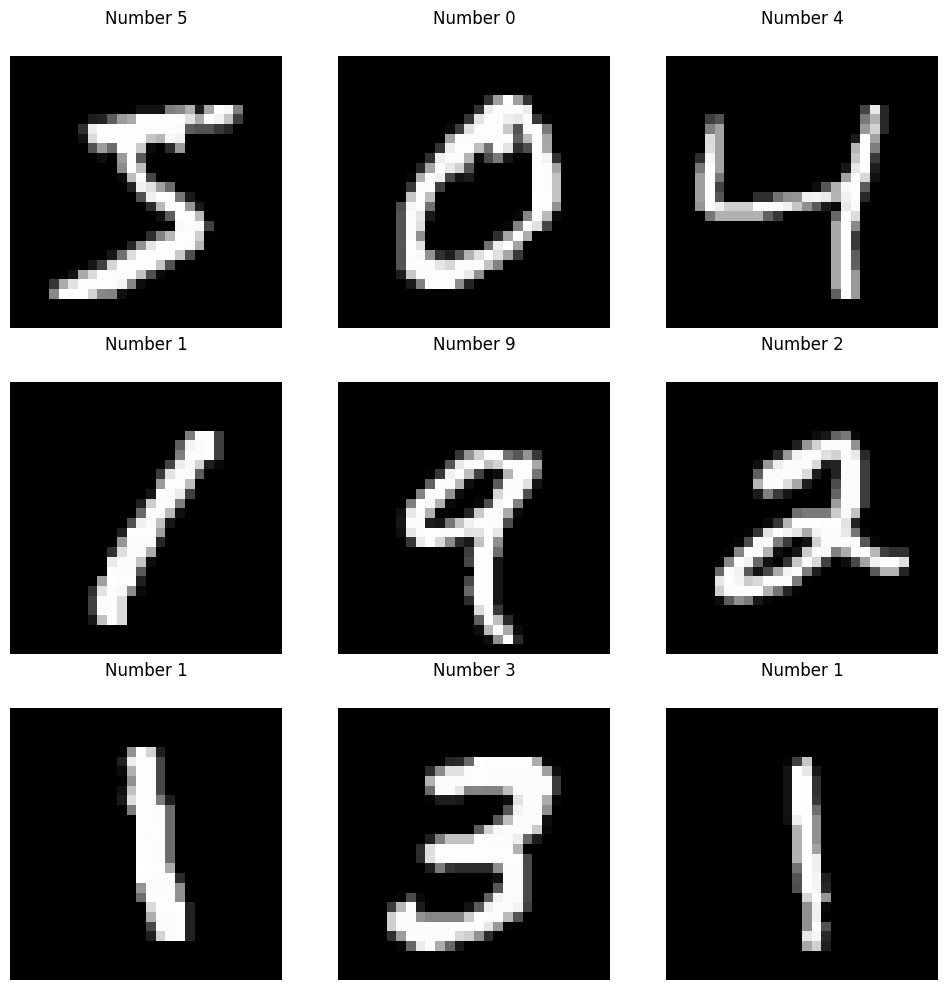

In [9]:
#create figure with 3* 3 subplots using matplotlib.pyplot
fig, axs=plt.subplots(3,3,figsize=(12,12))
plt.gray()

#loop through subplots and add mnist images
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))

  #display  the figure
plt.show()

In [10]:
#MNIST Data preprocessing
#convert each image to 1 dimensional array
X=x_train.reshape(len(x_train),-1)
Y=y_train
#normalize the data to 0-1
X=X.astype(float)/255.
print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [11]:
#K-means clustering
from sklearn.cluster import MiniBatchKMeans
n_digits=len(np.unique(y_test))
print(n_digits)
#initialize KMeans model
kmeans=MiniBatchKMeans(n_clusters=n_digits)
#Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [12]:
kmeans.labels_

array([1, 4, 8, ..., 2, 0, 2], dtype=int32)

In [13]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels={}
  for i in range(kmeans.n_clusters):
    #find index of points in cluster
    labels=[]
    index=np.where(kmeans.labels_==i)
    #append the actual labels for each point in cluster
    labels.append(actual_labels[index])
    #determine most common label
    if len(labels[0])==1:
      counts=np.bincount(labels[0])
    else:
      counts=np.bincount(np.squeeze(labels))

      #assign the cluster to a value in the inferred_labels dictionary
      if np.argmax(counts) in inferred_labels:
        inferred_labels[np.argmax(counts)].append(i)
      else:
        inferred_labels[np.argmax(counts)]=[i]
  return inferred_labels
def infer_data_labels(X_labels, cluster_labels):
  #empty array of len(X)
  predicted_labels=np.zeros(len(X_labels)).astype(np.uint8)
  for i,cluster in enumerate(X_labels):
    for key,value in cluster_labels.items():
      if cluster in value:
        predicted_labels[i]=key
  return predicted_labels




In [14]:
#test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels=infer_cluster_labels(kmeans,Y)
x_clusters=kmeans.predict(X)
predicted_labels=infer_data_labels(x_clusters,cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 7 2 1 8 1 7 8 1 3 6 1 7 2 5 6 5]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [15]:
from sklearn import metrics
def calculate_metrics(estimator,data,labels):

  #calculate and print metrics
  print('Number of Clusters{}'.format(estimator.n_clusters))
  print("Inertia:{}".format(estimator.intertia_))
  print("Homogeneity:{}".format(metrics.homogeneity_score(labels,estimator.labels_)))

In [16]:
clusters=[10,16,36,64,144,256]

# Redefine calculate_metrics to fix the typo
def calculate_metrics(estimator,data,labels):
  #calculate and print metrics
  print('Number of Clusters{}'.format(estimator.n_clusters))
  print("Inertia:{}".format(estimator.inertia_)) # Corrected typo here
  print("Homogeneity:{}".format(metrics.homogeneity_score(labels,estimator.labels_)))

#test different number of clusters
for n_clusters in clusters:
  estimator=MiniBatchKMeans(n_clusters=n_clusters)
  estimator.fit(X)
  #print cluster metrics
  calculate_metrics(estimator,X,Y)
  cluster_labels=infer_cluster_labels(estimator,Y)
  predicted_Y=infer_data_labels(estimator.labels_,cluster_labels)
  print("Accuracy:{}\n".format(metrics.accuracy_score(Y,predicted_Y)))

Number of Clusters10
Inertia:2370904.483836168
Homogeneity:0.4569809181361576
Accuracy:0.5587

Number of Clusters16
Inertia:2212110.4172519543
Homogeneity:0.5571063431901477
Accuracy:0.6469333333333334

Number of Clusters36
Inertia:1955220.6114716476
Homogeneity:0.6765796007324735
Accuracy:0.7514

Number of Clusters64
Inertia:1803389.1172039276
Homogeneity:0.745296687278015
Accuracy:0.8137

Number of Clusters144
Inertia:1622497.416487768
Homogeneity:0.807483706033715
Accuracy:0.8720166666666667

Number of Clusters256
Inertia:1506949.98762491
Homogeneity:0.8399013048820834
Accuracy:0.89345



In [17]:
#test kmeans algorithm on testion dataset
#convert each image to 1 dimensional array
X_test=x_test.reshape(len(x_test),-1)

#normalize the data to 0-1
X_test=X_test.astype(float)/255.

#initialize and fit k,eans algorithm on training data
kmeans=MiniBatchKMeans(n_clusters= 256)
kmeans.fit(X)
cluster_labels=infer_cluster_labels(kmeans,Y)

#predict labels for testing data
test_clusters=kmeans.predict(X_test)
predicted_labels=infer_data_labels(kmeans.predict(X_test),cluster_labels)
print("Accuracy:{}\n".format(metrics.accuracy_score(y_test,predicted_labels)))

Accuracy:0.9043



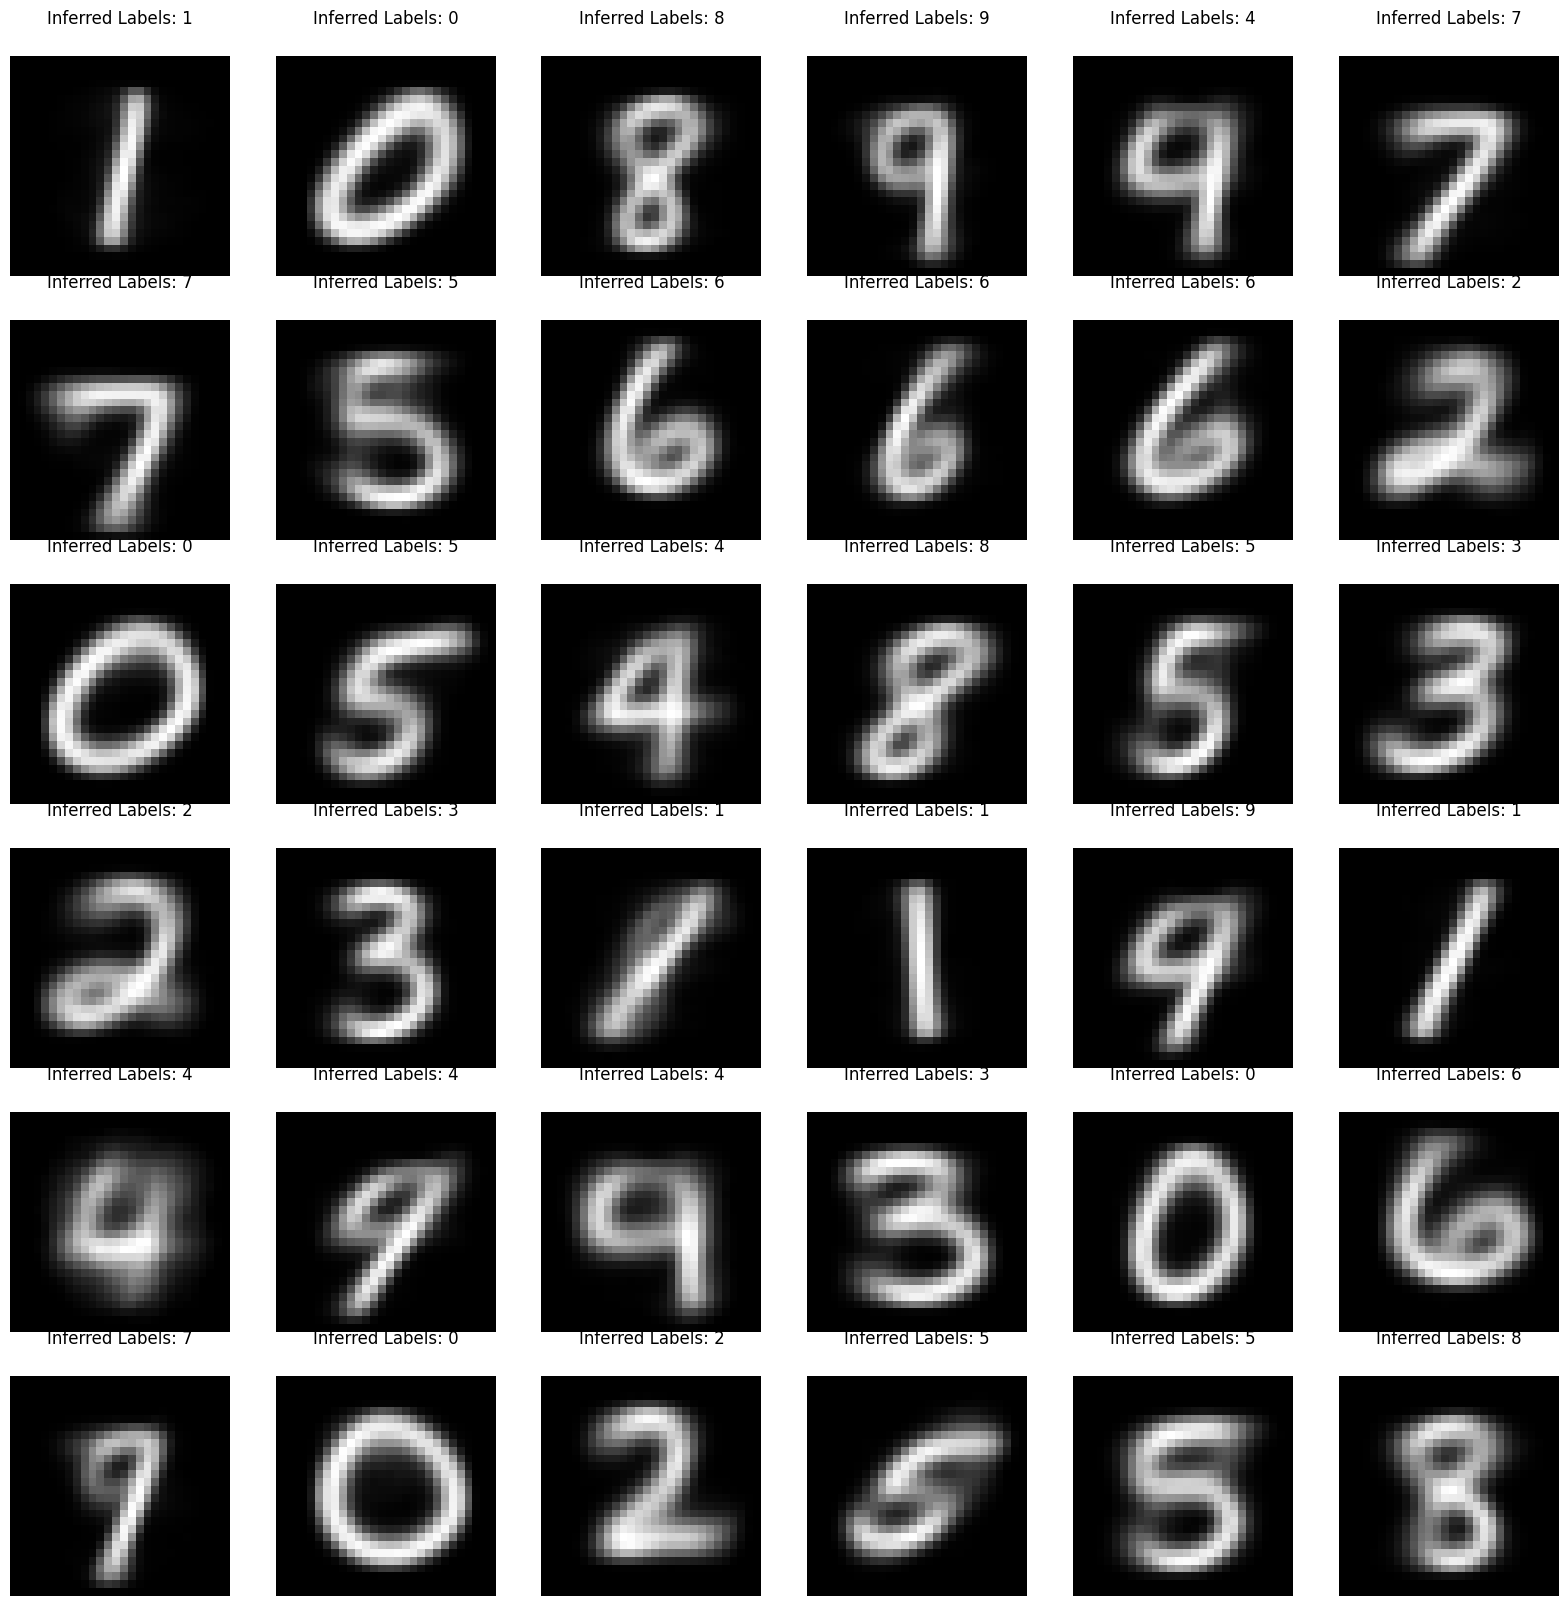

In [21]:
#visualizing cluster centroids

#initialize and fit KMeans algorithm
kmeans=MiniBatchKMeans(n_clusters=36)
kmeans.fit(X)

#record centroid values
centroid=kmeans.cluster_centers_
#reshape centroid into imagegs
images=centroid.reshape(36,28,28)
images*=255
images=images.astype(np.uint8)

#determine the cluster labels
cluster_labels=infer_cluster_labels(kmeans,Y)

# Create a reverse mapping from cluster_id to inferred_label
cluster_to_inferred_label = {}
for inferred_label, cluster_ids in cluster_labels.items():
    for cluster_id in cluster_ids:
        cluster_to_inferred_label[cluster_id] = inferred_label

#create figure with subplots using matplotlib.pyplot
fig,axs=plt.subplots(6,6,figsize=(20,20))
plt.gray()
#loop through subplots and add centroid images
for i,ax in enumerate(axs.flat):
  if i < len(images):
    inferred_digit = cluster_to_inferred_label.get(i, 'N/A')
    ax.set_title("Inferred Labels: {}".format(inferred_digit))

    #add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

#display the figure
plt.show()